In [1]:
import numpy as np
from math import log
import matplotlib.pyplot as plt

In [2]:
def newton(F, u0, eps = 10 ** -12, h = 10 ** -5):
    u = u0
    dx = np.ones(len(u0))
    i = 0
    fu = np.zeros((len(u0), len(u0)))
    
    while abs(np.min(dx)) > eps :
        #print("Iteration:", i)
        i += 1
        for j in range(len(u0)):
            du = np.zeros((len(u0), 1))
            du[j] = h
            #print(u)
            #print(du)
            #print(u + du)
            val = (F(u + du) - F(u - du)) / (2 * h)
            for k in range(len(u0)):
                fu[j][k]= val[k][0]
        dx = (np.linalg.inv(fu.T) @ F(u))
        u -= dx
    return u

def f(x):
    return 100 * np.exp(-np.multiply((10 * (x - 0.5)), (10 * (x - 0.5))))

def F(u):
    res = np.zeros((N - 1, 1))
    res[0] = (u[1] - u[0]) * (k0 + k1 * (u[0] ** 2 + u[1] ** 2) / 2) - u[0] * (k0 + k1 * (u[0] ** 2) / 2) - (x[0] - x[1]) ** 2 * f(np.array(x[0]))
    res[N - 2] = (- u[N - 2]) * (k0 + k1 * u[N - 2] ** 2) - (u[N - 2] - u[N - 3]) * (k0 + k1 * (u[N - 2] ** 2 + u[N - 3] ** 2) / 2) - (x[N - 2] - x[N - 1]) ** 2 * f(np.array(x[N - 2]))
    for i in range(1, N - 2):
        res[i] = (u[i + 1] - u[i]) * (k0 + k1 * (u[i] ** 2 + u[i + 1] ** 2) / 2) - (u[i] - u[i - 1]) * (k0 + k1 * (u[i] ** 2 + u[i - 1] ** 2) / 2) - (x[i] - x[i + 1]) ** 2 * f(np.array(x[i]))
    return res

In [3]:
border = (-1, 1)
N = 128
k0 = 1
k1 = 0.05
x = np.linspace(border[0], border[1], N + 1)
u0 = np.zeros((N - 1, 1))
answer = newton(F, u0)

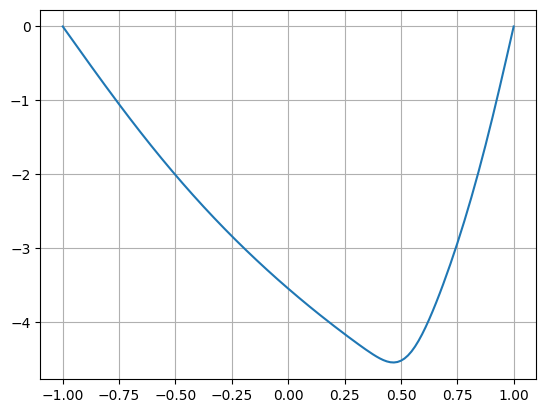

In [4]:
plt.plot(x, [0] + [t[0] for t in answer] + [0])
plt.grid(True)